# Pitfalls and best practices in interpreting correlation

- Anscombe’s Quartet
- the impact of outliers and the value of visualisation
- the limitations of summary statistics


In [ ]:
# Import the required libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load Anscombe's quartet data.
anscombe = sns.load_dataset("anscombe")

# View the output.
print(anscombe.shape)
anscombe.head()

(44, 3)


dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33

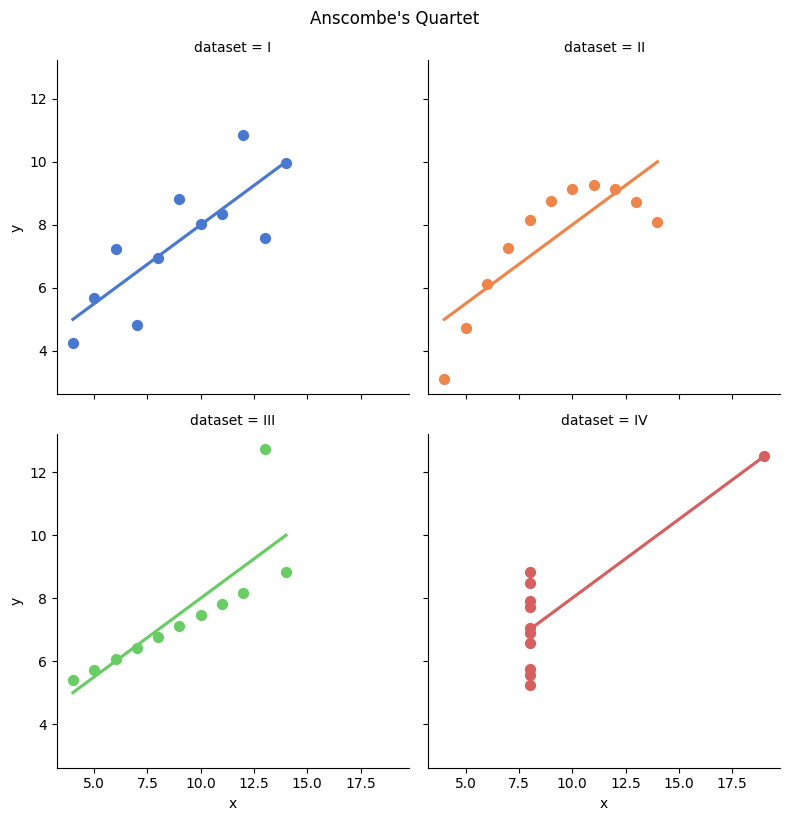

In [ ]:
# Plot the four data sets of Anscombe's quartet.
g = sns.lmplot(x="x",
               y="y",
               col="dataset",
               hue="dataset",
               data=anscombe,
               col_wrap=2,
               ci=None,
               palette="muted",
               height=4,
               scatter_kws={"s": 50, "alpha": 1})

g.fig.suptitle("Anscombe's Quartet", y=1.02)

plt.show()

In [ ]:
# Compare the statistical data.
# Calculate mean, variance, and correlation for each data set.
statistics = []

for dataset in anscombe['dataset'].unique():
    subset = anscombe[anscombe['dataset'] == dataset]
    mean_x = subset['x'].mean()
    mean_y = subset['y'].mean()
    var_x = subset['x'].var()
    var_y = subset['y'].var()
    corr = subset['x'].corr(subset['y'])

    statistics.append({'Dataset': dataset,
                       'Mean of x': mean_x,
                       'Mean of y': mean_y,
                       'Variance of x': var_x,
                       'Variance of y': var_y,
                       'Correlation between x and y': corr})
print(statistics)


# Display the statistics as a DataFrame.
statistics_df = pd.DataFrame(statistics)
statistics_df

[{'Dataset': 'I', 'Mean of x': 9.0, 'Mean of y': 7.500909090909093, 'Variance of x': 11.0, 'Variance of y': 4.127269090909091, 'Correlation between x and y': 0.81642051634484}, {'Dataset': 'II', 'Mean of x': 9.0, 'Mean of y': 7.50090909090909, 'Variance of x': 11.0, 'Variance of y': 4.127629090909091, 'Correlation between x and y': 0.8162365060002428}, {'Dataset': 'III', 'Mean of x': 9.0, 'Mean of y': 7.5, 'Variance of x': 11.0, 'Variance of y': 4.12262, 'Correlation between x and y': 0.8162867394895984}, {'Dataset': 'IV', 'Mean of x': 9.0, 'Mean of y': 7.500909090909091, 'Variance of x': 11.0, 'Variance of y': 4.123249090909091, 'Correlation between x and y': 0.8165214368885028}]


Dataset  Mean of x  Mean of y  Variance of x  Variance of y  \
0       I        9.0   7.500909           11.0       4.127269   
1      II        9.0   7.500909           11.0       4.127629   
2     III        9.0   7.500000           11.0       4.122620   
3      IV        9.0   7.500909           11.0       4.123249   

   Correlation between x and y  
0                     0.816421  
1                     0.816237  
2                     0.816287  
3                     0.816521